In [2]:
import pickle
import numpy as np
import pandas as pd
import time
import os

def picklereader(fpath):
    with open(fpath,'rb') as f:
        content = pd.read_pickle(f)
    return content



In [2]:
#removed corrupted records
df = df[df.PID != 'F0871']
df = df[df.PID != 'F1481']

In [ ]:
df.loc[68]

In [3]:
df.shape

(1447, 128)

In [4]:
#Save extracted data to file
#with open('data/df18S_rs_extract.p',"wb") as f:
#    pickle.dump(df, f)

In [2]:
import pickle
import numpy as np
import pandas as pd
import time
import os
from feature_utils import *

def picklereader(fpath):
    with open(fpath,'rb') as f:
        content = pd.read_pickle(f)
    return content

df = picklereader(os.getcwd()+'/data/df18S_rs_extract.p')

In [10]:
pd.options.display.max_columns = None
df.describe()

,gender,age,vessel,seg,ffr,ffr_80,n_frame,OS,distal,sx0,sz,OS_PB40,OS_PB70,OS_MLA,MLA,EEM_MLA,PB_MLA,No_PB40,No_PB70,No_lumen40_ROI,No_lumen25_ROI,No_lumen30_ROI,Sum_plaque_ROI,Sum_EEM_ROI,PB_ROI,mean_lumen_ROI,mean_plaque_ROI,mean_EEM_ROI,No_lumen40_PB40,No_lumen25_PB40,No_lumen30_PB40,Sum_plaque_PB40,Sum_EEM_PB40,PB_PB40,mean_lumen_PB40,mean_plaque_PB40,mean_EEM_PB40,No_lumen40_PB70,No_lumen25_PB70,No_lumen30_PB70,Sum_plaque_PB70,Sum_EEM_PB70,PB_PB70,mean_lumen_PB70,mean_plaque_PB70,mean_EEM_PB70,No_lumen40_worst,No_lumen25_worst,Sum_plaque_worst,Sum_EEM_worst,PB_worst,mean_lumen_worst,mean_plaque_worst,mean_EEM_worst,No_lumen40_prox,No_lumen25_prox,No_lumen30_prox,Sum_plaque_prox,Sum_EEM_prox,PB_prox,mean_lumen_prox,mean_plaque_prox,mean_EEM_prox,max_EEM_prox,No_lumen40_distal,No_lumen25_distal,No_lumen30_distal,Sum_plaque_distal,Sum_EEM_distal,PB_distal,mean_lumen_distal,mean_plaque_distal,mean_EEM_distal,max_EEM_distal,No_lumen40_prox5,No_lumen25_prox5,No_lumen30_prox5,Sum_plaque_prox5,Sum_EEM_prox5,PB_prox5,mean_lumen_prox5,mean_plaque_prox5,mean_EEM_prox5,max_EEM_prox5,No_lumen40_dist5,No_lumen25_dist5,No_lumen30_dist5,Sum_plaque_dist5,Sum_EEM_dist5,PB_dist5,mean_lumen_dist5,mean_plaque_dist5,mean_EEM_dist5,max_EEM_dist5,mean_lumen_aver,mean_EEM_aver,area1_stenosis_aver,area1_stenosis_prox5,area1_stenosis_dist5,area2_stenosis_aver,area2_stenosis_prox5,area2_stenosis_dist5,area3_stenosis_aver,area3_stenosis_prox5,area3_stenosis_dist5,area4_stenosis_aver,area4_stenosis_prox5,area4_stenosis_dist5,RI_MLA_ref,RI_MLA_prox5,RI_worst_ref,RI_worst_prox5,variance_lumen_worst,variance_lumen_PB40,variance_plaque_worst,variance_plaque_PB40,long_eccentricity_worst,long_eccentricity_PB40
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.0,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.0,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,1.284727,62.260539,1.717346,1.612992,0.826469,0.347616,3396.956462,3007.158950,488.688321,495.767795,3396.956462,138.979267,377.673117,1540.463027,3.116751,11.837890,0.719408,2056.926745,341.562543,540.729095,123.366966,246.737388,18030.168524,36632.747128,0.488229,6.877006,7.700349,14.577356,531.105736,123.182446,245.709053,15404.225882,29598.191155,0.501263,6.219823,8.138572,14.358395,250.462336,87.336558,150.093296,2994.043580,4851.905858,0.432866,2.705680,8.098178,10.803858,165.938493,59.477540,2447.782928,3623.545052,0.661103,4.166473,8.462812,12.629284,0.080857,0.0,0.004838,832.430241,2424.599669,0.111628,3.634093,2.018325,5.652418,6.349676,5.664133,0.180373,0.712509,535.133051,1560.806225,0.154104,3.325866,1.822390,5.148256,5.627224,0.064962,0.0,0.004147,397.094386,1156.445356,0.111052,3.613444,1.993569,5.607013,6.055588,3.316517,0.006911,0.090532,324.213

(array([   3.,    3.,    3.,    1.,    4.,    5.,   13.,   25.,   28.,
          41.,   63.,  108.,   98.,  162.,  196.,  217.,  182.,  167.,
         102.,   26.]),
 array([ 0.39  ,  0.4205,  0.451 ,  0.4815,  0.512 ,  0.5425,  0.573 ,
         0.6035,  0.634 ,  0.6645,  0.695 ,  0.7255,  0.756 ,  0.7865,
         0.817 ,  0.8475,  0.878 ,  0.9085,  0.939 ,  0.9695,  1.    ]),
 <a list of 20 Patch objects>)

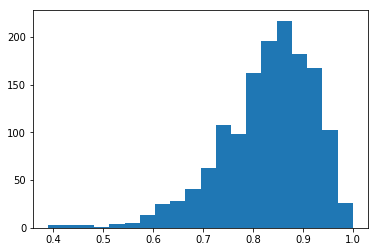

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['ffr'],bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x11570c240>],
 'caps': [<matplotlib.lines.Line2D at 0x11570cd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x115719ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115719668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11570c470>,
  <matplotlib.lines.Line2D at 0x11570c908>]}

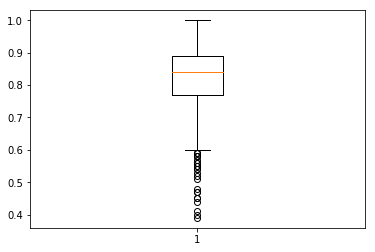

In [6]:
plt.boxplot(df['ffr'])

In [8]:
df['ffr'].describe()

count    1447.000000
mean        0.826469
std         0.092298
min         0.390000
25%         0.770000
50%         0.840000
75%         0.890000
max         1.000000
Name: ffr, dtype: float64

(array([   3.,    1.,    7.,    9.,   25.,   37.,   70.,   84.,  119.,
          80.,  160.,  166.,  158.,  179.,  146.,   86.,   69.,   27.,
          18.,    3.]),
 array([ 29. ,  31.9,  34.8,  37.7,  40.6,  43.5,  46.4,  49.3,  52.2,
         55.1,  58. ,  60.9,  63.8,  66.7,  69.6,  72.5,  75.4,  78.3,
         81.2,  84.1,  87. ]),
 <a list of 20 Patch objects>)

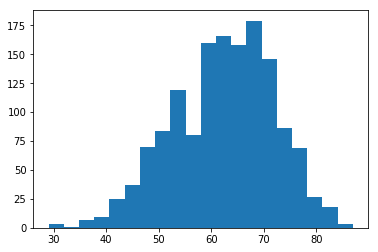

In [12]:
plt.hist(df['age'],bins=20)

/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


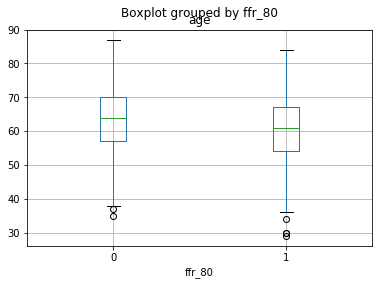

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df.boxplot(column=['age'], by='ffr_80')

(array([ 1035.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,   412.]),
 array([ 1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
         1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,
         1.9 ,  1.95,  2.  ]),
 <a list of 20 Patch objects>)

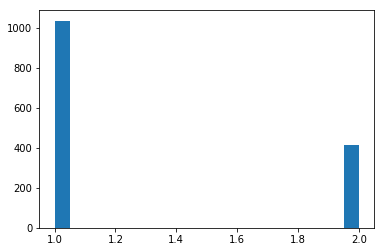

In [13]:
plt.hist(df['gender'],bins=20)

/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


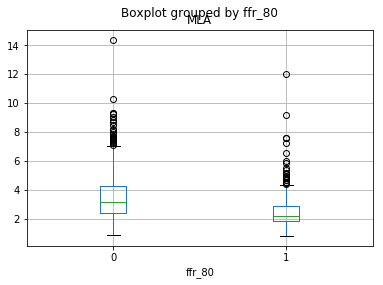

In [17]:
df.boxplot(column=['MLA'], by='ffr_80')

/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


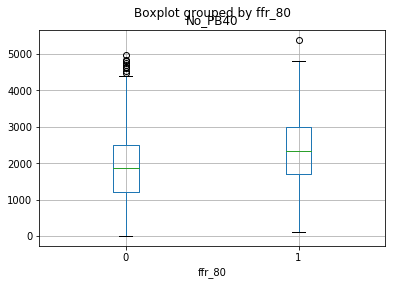

In [24]:

df.boxplot(column=['No_PB40'], by='ffr_80')

(array([ 944.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  503.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

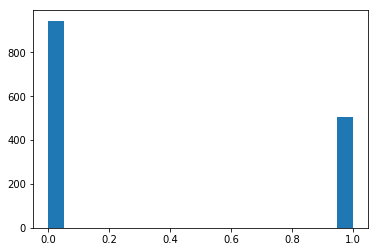

In [14]:
plt.hist(df['ffr_80'],bins=20)

# Correlation Matrix

In [15]:
col = ['PID','n_frame','OS','distal','sx0','sz','ffr','ffr_80','lu','pl','luA','plA','pb','luAc','plAc','len_PB40','len_PB70']
dfdrop = df.drop(col, axis=1)

In [16]:
dfcorr = dfdrop.corr()
dfcorr1 = dfcorr.mask(~np.tril(np.ones(dfcorr.shape)).astype(np.bool))
dfcorr2 = dfcorr1.unstack()
dfcorr3 = dfcorr2[dfcorr2[:] != 1].sort_values(ascending=False)
dfcorr4 = dfcorr3[~np.isnan(dfcorr3)]

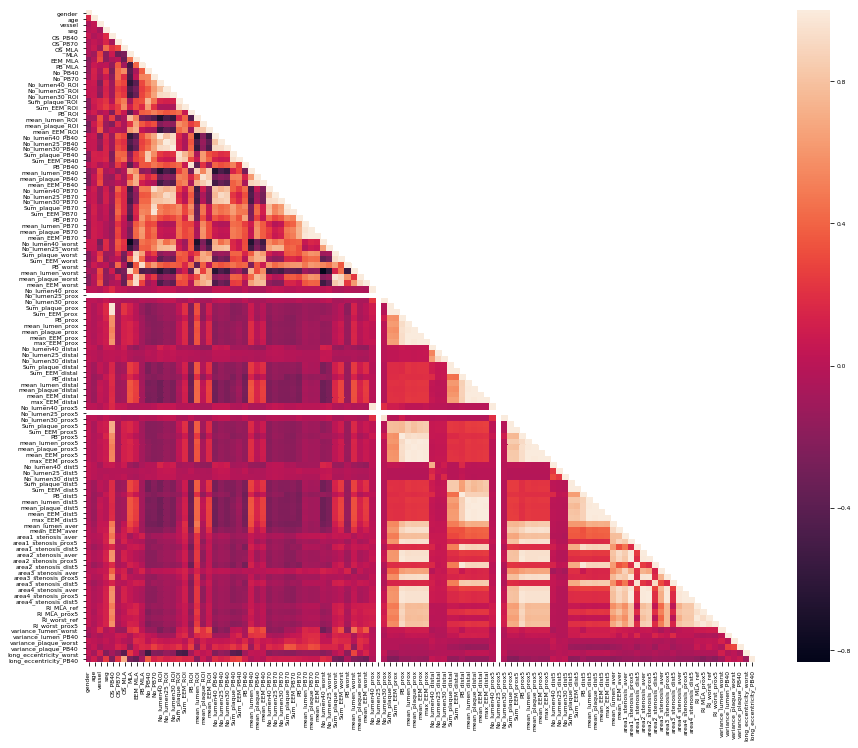

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 6})
sns.heatmap(dfcorr1, 
        xticklabels=dfcorr.columns,
        yticklabels=dfcorr.columns)
plt.savefig('dfcorr.pdf')
plt.show()

There are white lines in the matrix suggesting high correlation. The features are No_lumen25_prox and No_lumen25_prox5. Looking at these features more closely they are all zero values. In this particular feature there are no proximal region with a lumen area less than 2.5mm2.

In [18]:
print(dfcorr4.to_string())

No_lumen25_ROI           No_lumen25_PB40            0.999889
No_lumen30_ROI           No_lumen30_PB40            0.999547
PB_distal                PB_dist5                   0.999017
max_EEM_distal           max_EEM_dist5              0.998880
PB_prox                  PB_prox5                   0.998650
mean_lumen_dist5         mean_EEM_dist5             0.998425
mean_EEM_distal          mean_EEM_dist5             0.998382
mean_lumen_prox5         mean_EEM_prox5             0.998302
mean_lumen_distal        mean_EEM_distal            0.998296
mean_lumen_prox          mean_EEM_prox              0.998141
mean_plaque_distal       mean_plaque_dist5          0.997959
mean_EEM_prox            mean_EEM_prox5             0.997876
mean_lumen_distal        mean_lumen_dist5           0.997794
mean_plaque_prox         mean_plaque_prox5          0.997386
mean_lumen_prox          mean_lumen_prox5           0.997303
mean_plaque_PB70         mean_EEM_PB70              0.997262
mean_EEM_prox5          

In [19]:
dfdrop = dfdrop.drop('No_lumen25_prox', axis=1)
dfdrop = dfdrop.drop('No_lumen25_prox5', axis=1)

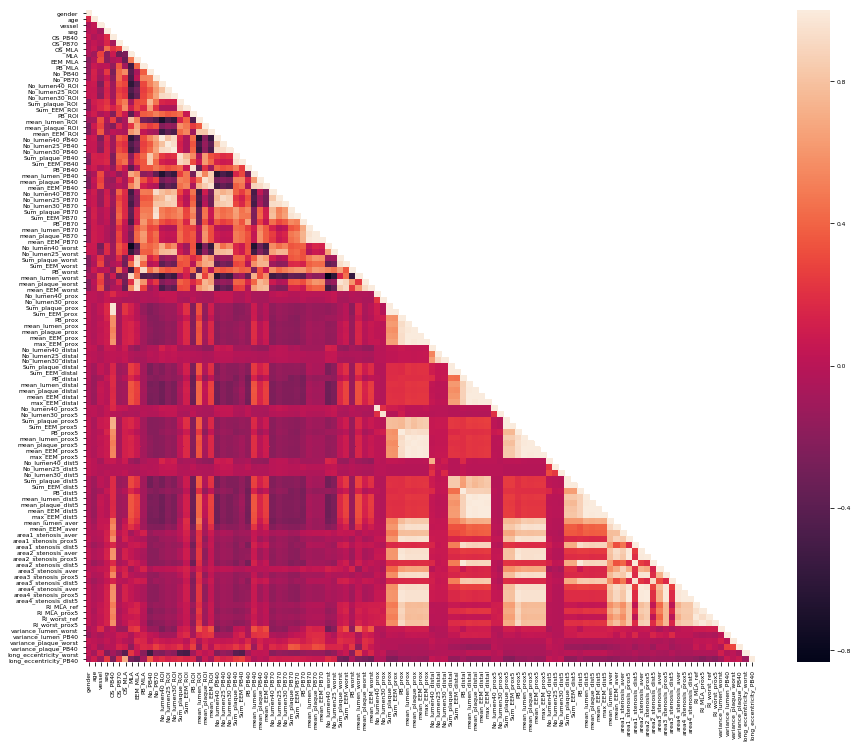

In [20]:
dfcorr = dfdrop.corr()
dfcorr1 = dfcorr.mask(~np.tril(np.ones(dfcorr.shape)).astype(np.bool))
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 6})
sns.heatmap(dfcorr1, 
        xticklabels=dfcorr.columns,
        yticklabels=dfcorr.columns)
plt.savefig('dfcorr.pdf')
plt.show()

In [21]:
corr_matrix = dfdrop.corr().abs()
upper = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_reduce = dfdrop.drop(to_drop, axis=1)
df_reduce.shape

(1447, 65)

Our reduced data is down from 128 features to 65 after removing non-features and correlations > 0.95.

In [22]:
# dropped highly correlated features
to_drop

['No_lumen40_PB40',
 'No_lumen25_PB40',
 'No_lumen30_PB40',
 'PB_PB40',
 'mean_plaque_PB40',
 'Sum_EEM_PB70',
 'mean_plaque_PB70',
 'mean_EEM_PB70',
 'mean_plaque_worst',
 'Sum_plaque_prox',
 'Sum_EEM_prox',
 'mean_plaque_prox',
 'mean_EEM_prox',
 'max_EEM_prox',
 'Sum_EEM_distal',
 'mean_plaque_distal',
 'mean_EEM_distal',
 'max_EEM_distal',
 'No_lumen40_prox5',
 'No_lumen30_prox5',
 'Sum_EEM_prox5',
 'PB_prox5',
 'mean_lumen_prox5',
 'mean_plaque_prox5',
 'mean_EEM_prox5',
 'max_EEM_prox5',
 'Sum_EEM_dist5',
 'PB_dist5',
 'mean_lumen_dist5',
 'mean_plaque_dist5',
 'mean_EEM_dist5',
 'max_EEM_dist5',
 'mean_EEM_aver',
 'area1_stenosis_prox5',
 'area2_stenosis_aver',
 'area2_stenosis_prox5',
 'area2_stenosis_dist5',
 'area3_stenosis_prox5',
 'area3_stenosis_dist5',
 'area4_stenosis_aver',
 'area4_stenosis_prox5',
 'area4_stenosis_dist5',
 'RI_worst_ref',
 'RI_worst_prox5']

In [23]:
#Save reduced data to file
#with open('data/df18S_rs_reduce.p',"wb") as f:
#    pickle.dump(df_reduce, f)

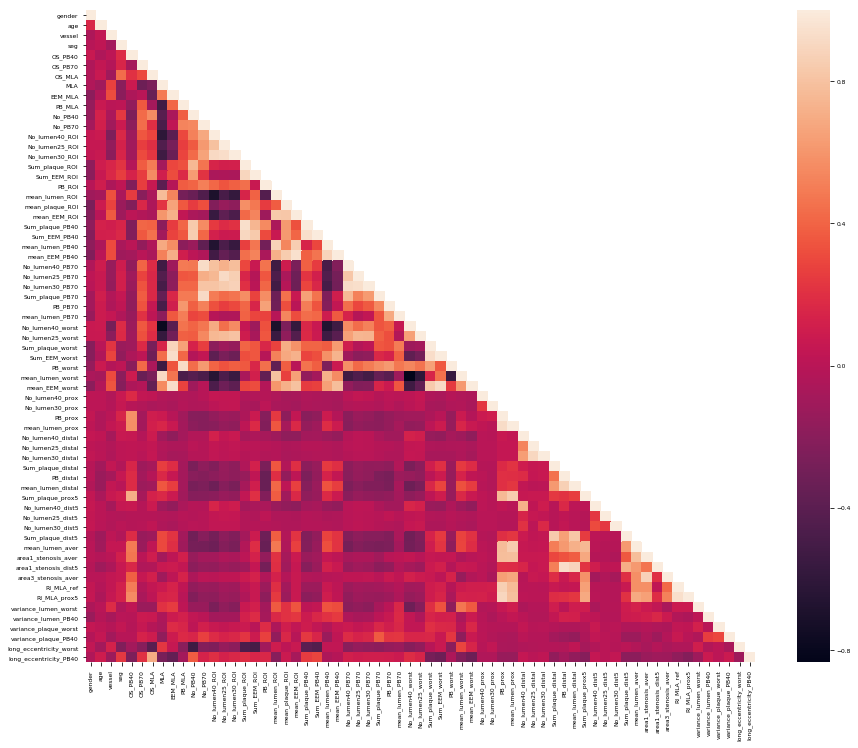

In [24]:
dfcorr = df_reduce.corr()
dfcorr1 = dfcorr.mask(~np.tril(np.ones(dfcorr.shape)).astype(np.bool))
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 6})
sns.heatmap(dfcorr1, 
        xticklabels=dfcorr.columns,
        yticklabels=dfcorr.columns)
plt.savefig('dfcorr_reduce.pdf')
plt.show()

# PCA Component Analysis

In [ ]:
dfdrop.shape

In [ ]:
dfdrop.head()

In [ ]:
print(df.isnull().sum().to_string())
### investigate null values 

In [ ]:
dfdrdf.dropna()

In [ ]:
from sklearn.decomposition import PCA

nf = 111
pca = PCA(n_components=nf)
# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit_transform(dfdrop)

dfpca = pca.transform(dfdrop)
dfpca

In [ ]:
x = np.array([
        [0.387,4878, 5.42, 5.42],
        [0.723,12104,5.25, 5.42],
        [1,12756,5.52, 5.42],
        [1.524,6787,3.94, 5.42],
    ])


pca = PCA(n_components=3)
pca.fit_transform(x)
dfpca = pca.transform(x)
dfpca


In [ ]:
df.iloc[1]

In [ ]:
i=42
distal = df.iloc[i]['distal']
os = df.iloc[i]['OS']
luAc = df.iloc[i]['luAc']
plAc = df.iloc[i]['plAc']
pbth = 0.4
th = 4.0
gap = 300

In [ ]:
no_lumen40_prox5(luAc,plAc,distal,os,pbth,th,gap)

In [ ]:
lesion(luAc,plAc,distal,os,pbth,gap) == -1

In [ ]:
len(df)

In [ ]:
test = [6,7,4,8,1,5,8,3]
np.argmin(test)

In [ ]:
test = [1,2,3]
test[-1]

# TEST NaN values

In [71]:
def convolvevis(i, th, gap, show=True):
    """
    i: index
    th: plaqueburden threshold
    """
    # raw data
    pb = plaqueburden(df.loc[i].luA, df.loc[i].plA)
    #lesionindex = lesion(df.loc[i].luA, df.loc[i].plA,df.loc[i].distal,df.loc[i].OS,th,300)
    # smoothed data
    pb2 = plaqueburden(df.loc[i].luAc, df.loc[i].plAc)
    lesionindex2 = lesion(df.loc[i].luAc, df.loc[i].plAc,df.loc[i].distal,df.loc[i].OS,th,gap)
    print(lesionindex2)
    plt.figure(figsize=(12,5));
    plt.plot(pb,alpha=0.3,label='original')
    plt.plot(pb2, color='red',alpha=0.7,label='smooth 50')
    ymax = max(pb)
    plt.ylim(0,ymax)
    ki = df['distal'].loc[i]
    kf = df['OS'].loc[i]
    plt.axvline(kf, color='cyan', label='OS')
    plt.axvline(ki, color='darkcyan',label='distal')
    plt.axhline(th, linestyle='--', color='red',label=th,alpha=0.5)
    
    if(lesionindex2 != -1):
        for l in range(0,len(lesionindex2)):
            start = lesionindex2[l][0]
            end = lesionindex2[l][1]
            plt.axvspan(start, end, facecolor='r', alpha=0.2)
    plt.legend(loc="right",bbox_to_anchor=(1.3, 0.5));
    if show:
        plt.show()
    else:
        return plt

/Users/paulnguyen/Desktop/Regis/Practicum2/bloodpressure_ffr/feature_utils.py:99: RuntimeWarning: invalid value encountered in true_divide
  return y/(x + y)
/Users/paulnguyen/Desktop/Regis/Practicum2/bloodpressure_ffr/feature_utils.py:109: RuntimeWarning: invalid value encountered in greater
  index = np.where(plaqueburden(lu,pl) > pbth)[0]


-1


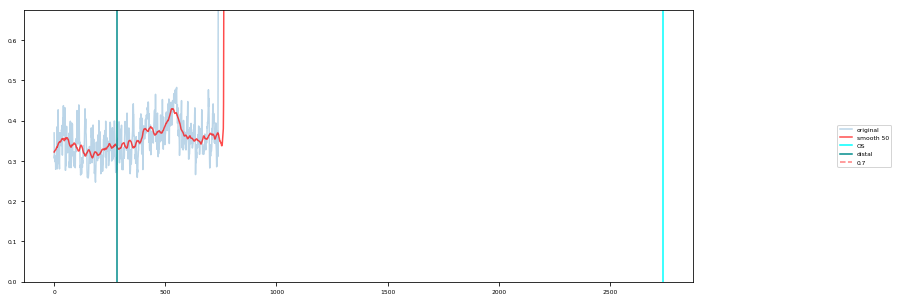

In [75]:
convolvevis(1326,0.7,300)

In [87]:
df.loc[1326]

PID                                                                    F1481
gender                                                                     1
age                                                                       59
vessel                                                                     3
seg                                                                        1
ffr                                                                     0.91
ffr_80                                                                     0
n_frame                                                                 2830
OS                                                                      2738
distal                                                                   283
sx0                                                                      512
sz                                                                      2830
lu                         [6581, 7234, 7041, 7231, 7025, 7058, 6885, 716...

-1


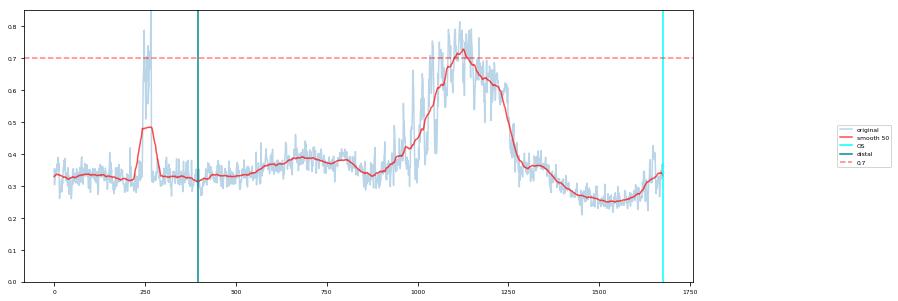

In [86]:
convolvevis(68,0.7,300)

In [89]:
variance_lumen_pb40(df.loc[68].luAc,df.loc[68].plAc,df.loc[68].distal,df.loc[68].OS,0.4)

/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [100]:
x = np.array(df.loc[68].luAc)
y = np.array(df.loc[68].plAc)
pb = y/(x + y)
pb2 = np.where(pb > 0.4)[0]
roi = pb2[df.loc[68].distal:df.loc[68].OS]
len(roi)
#np.var(df.loc[68].luAc[roi])

0

In [ ]:
x = np.array(luA)
y = np.array(plA)
pb = y/(x + y)
pb2 = np.where(pb > pbth)[0]
roi = pb2[distal:os]
return np.var(luA[roi])